In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('weatherHistory.csv')
df.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
df.shape

(96453, 12)

In [7]:
df.shape

(96453, 12)

In [8]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [9]:
round((df.isnull().sum()*100)/len(df),2)

Formatted Date              0.00
Summary                     0.00
Precip Type                 0.54
Temperature (C)             0.00
Apparent Temperature (C)    0.00
Humidity                    0.00
Wind Speed (km/h)           0.00
Wind Bearing (degrees)      0.00
Visibility (km)             0.00
Loud Cover                  0.00
Pressure (millibars)        0.00
Daily Summary               0.00
dtype: float64

In [10]:
dt=df.dropna()

In [11]:
round((dt.isnull().sum()*100)/len(df),2)

Formatted Date              0.0
Summary                     0.0
Precip Type                 0.0
Temperature (C)             0.0
Apparent Temperature (C)    0.0
Humidity                    0.0
Wind Speed (km/h)           0.0
Wind Bearing (degrees)      0.0
Visibility (km)             0.0
Loud Cover                  0.0
Pressure (millibars)        0.0
Daily Summary               0.0
dtype: float64

In [12]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),95936.0,11.940976,9.570671,-21.822222,4.604167,12.033333,18.844444,39.905556
Apparent Temperature (C),95936.0,10.862531,10.717812,-27.716667,2.276389,12.033333,18.844444,39.344444
Humidity,95936.0,0.734841,0.195724,0.000000,0.600000,0.780000,0.890000,1.000000
Wind Speed (km/h),95936.0,10.804936,6.920727,0.000000,5.796000,9.933700,14.135800,63.852600
Wind Bearing (degrees),95936.0,187.518773,107.385351,0.000000,116.000000,180.000000,290.000000,359.000000
Visibility (km),95936.0,10.362402,4.173780,0.000000,8.372000,10.046400,14.812000,16.100000
Loud Cover,95936.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pressure (millibars),95936.0,1003.150038,117.276976,0.000000,1011.890000,1016.420000,1021.050000,1046.380000


In [13]:
dt.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [14]:
df['Formatted Date']

0        2006-04-01 00:00:00.000 +0200
1        2006-04-01 01:00:00.000 +0200
2        2006-04-01 02:00:00.000 +0200
3        2006-04-01 03:00:00.000 +0200
4        2006-04-01 04:00:00.000 +0200
                     ...              
96448    2016-09-09 19:00:00.000 +0200
96449    2016-09-09 20:00:00.000 +0200
96450    2016-09-09 21:00:00.000 +0200
96451    2016-09-09 22:00:00.000 +0200
96452    2016-09-09 23:00:00.000 +0200
Name: Formatted Date, Length: 96453, dtype: object

In [15]:
dt.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [16]:
dt1=dt.drop(['Loud Cover','Formatted Date','Daily Summary'],axis=1)

In [17]:
dt1['Summary'].value_counts()

Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encode=LabelEncoder()
dt1['Precip Type']=encode.fit_transform(dt1['Precip Type'])
dt1['Summary']=encode.fit_transform(dt1['Summary'])

In [20]:
dt1['Precip Type'].unique()

array([0, 1])

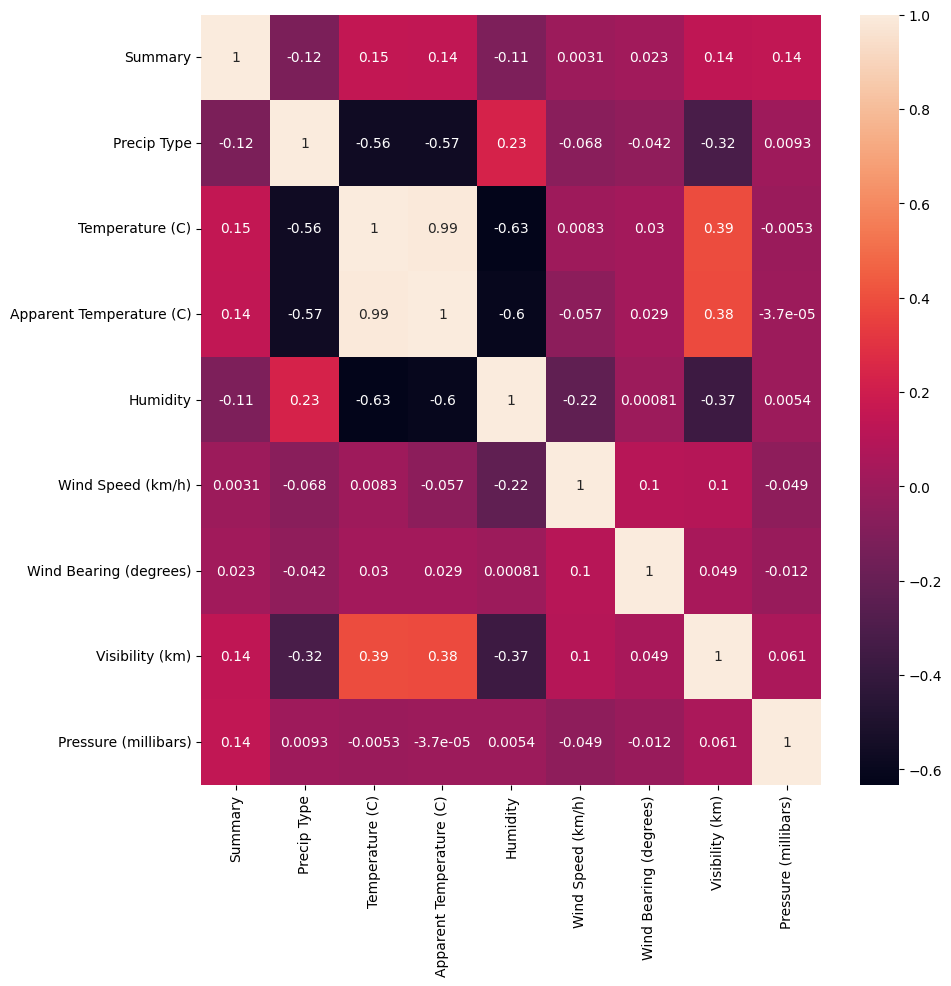

In [21]:
import seaborn as sns
import matplotlib.pyplot as pt
pt.figure(figsize=(10,10))
sns.heatmap(dt1.corr(),annot=True)
pt.show()

In [22]:
features = dt1.drop(['Precip Type'], axis=1)
target = dt1['Precip Type']
target.value_counts()

0    85224
1    10712
Name: Precip Type, dtype: int64

In [23]:
X_train, X_test,Y_train,Y_test = train_test_split(features,target,
                                      test_size=0.2,
                                      random_state=2)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(76748, 8)
(19188, 8)
(76748,)
(19188,)


In [25]:
reg=LogisticRegression()
xgb=XGBClassifier()

reg.fit(X_train, Y_train)
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
predict_reg=reg.predict(X_test)
predict_xgb=xgb.predict(X_test)

In [27]:
print(predict_reg[1:20])
print(predict_xgb[1:20])

[1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0]
[1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0]


In [28]:
score1=metrics.accuracy_score(Y_test,predict_reg)
score2=metrics.accuracy_score(Y_test,predict_xgb)

In [29]:
print('Score in LogisticRegression:',score1)
print('Score in XGB Classifier:',score2)

Score in LogisticRegression: 0.9965082343131123
Score in XGB Classifier: 0.9986971023556389


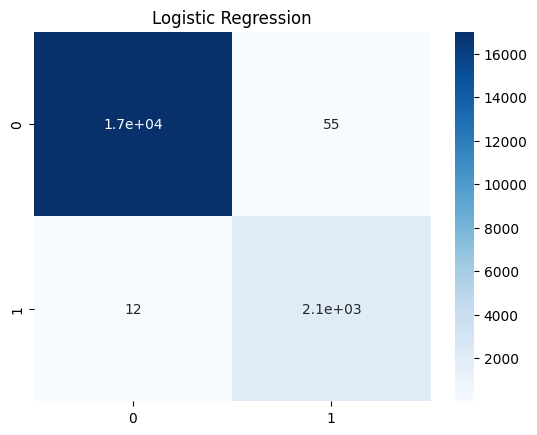

In [30]:
con=metrics.confusion_matrix(Y_test,predict_reg)
sns.heatmap(con,annot=True,cmap='Blues').set_title('Logistic Regression')
pt.show()

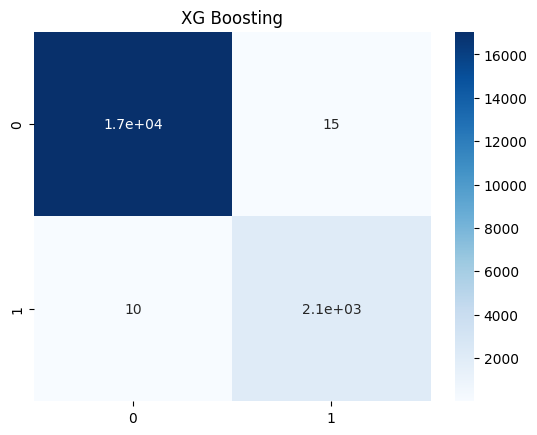

In [31]:
con=metrics.confusion_matrix(Y_test,predict_xgb)
sns.heatmap(con,annot=True,cmap='Blues').set_title('XG Boosting')
pt.show()

In [32]:
print('\tLogistic Regression Classification Report\n')
print(metrics.classification_report(Y_test,predict_reg))

	Logistic Regression Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17060
           1       0.97      0.99      0.98      2128

    accuracy                           1.00     19188
   macro avg       0.99      1.00      0.99     19188
weighted avg       1.00      1.00      1.00     19188



In [33]:
print('\tXG Boosting Classification Report\n')
print(metrics.classification_report(Y_test,predict_xgb))

	XG Boosting Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17060
           1       0.99      1.00      0.99      2128

    accuracy                           1.00     19188
   macro avg       1.00      1.00      1.00     19188
weighted avg       1.00      1.00      1.00     19188



In [34]:
Y_test.unique()

array([0, 1])

In [35]:
predict_xgb

array([0, 1, 0, ..., 0, 0, 1])

In [36]:
X_train.columns

Index(['Summary', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

In [38]:
summary=float(input('Enter your Summary Rate (0-26):'))
temp=float(input('Enter your Temperature Rate:'))
apperent=float(input('Enter your App.Temperature Rate:'))
hum=float(input('Enter your Humidity Rate:'))
wind=float(input('Enter your wind speed Rate:'))
bearing=float(input('Enter your wind bearing Rate:'))
vis=float(input('Enter your Visibility Rate:'))
pressure=float(input('Enter your Pressure Rate:'))

Enter your Summary Rate (0-26):4
Enter your Temperature Rate:34
Enter your App.Temperature Rate:45
Enter your Humidity Rate:333
Enter your wind speed Rate:455
Enter your wind bearing Rate:34
Enter your Visibility Rate:34
Enter your Pressure Rate:23


In [39]:
new_1=np.array([summary,temp,apperent,hum,wind,bearing,vis,pressure])
x_new_reshaped = new_1.reshape(1, -1)
#print(x_new_reshaped)
predictions_x = xgb.predict(x_new_reshaped)
#predictions_r = reg.predict(x_new_reshaped)
#print(predictions_r)
#print(predictions_x)
if predictions_x==0:
    print('It is Rainy Time')
elif predictions_x==1:
    print('It is Snow Time')
else:
    print('Wrong Details')

It is Rainy Time


## Project Explonation

In [42]:
predictions = reg.predict(x_new_reshaped)
predictions

array([0])

In [43]:
if predictions==0:
    print('If it is Rain')
elif predictions==1:
    print('If it is Snow')
else:
    print('Wrong Details')

If it is Rain


This Python script appears to be a machine learning project focused on predicting weather conditions (rain or snow) based on various features like summary, temperature, humidity, wind speed, and so on. Let's break down the steps and provide an explanation suitable for interview preparation:

1. **Importing Libraries**: The script starts by importing necessary libraries such as NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn, XGBoost, and Imbalanced-learn.

2. **Loading the Dataset**: The dataset is loaded using Pandas from a CSV file named 'weatherHistory.csv'. It's then displayed briefly using the `head()` method.

3. **Data Exploration and Preprocessing**:
   - `info()`: Provides information about the dataset, including the data types and number of non-null values in each column.
   - `shape`: Gives the number of rows and columns in the dataset.
   - `value_counts()`: Counts the occurrences of each unique value in the 'Precip Type' column.
   - Handling missing values:
     - Calculating the percentage of missing values for each column.
     - Dropping rows with missing values.
   - `describe()`: Provides summary statistics for numerical columns.
   - Dropping unnecessary columns ('Loud Cover', 'Formatted Date', 'Daily Summary').
   - Encoding categorical variables ('Precip Type' and 'Summary') using LabelEncoder.

4. **Data Visualization**:
   - Correlation heatmap using Seaborn's `heatmap()` function.

5. **Feature Selection and Target Definition**:
   - Defining features (independent variables) and target (dependent variable).
   - Splitting the dataset into training and testing sets using `train_test_split()`.

6. **Model Training**:
   - Training two classifiers: Logistic Regression and XGBoost.

7. **Model Evaluation**:
   - Making predictions on the test set.
   - Calculating accuracy scores using `accuracy_score()` from Scikit-learn.
   - Generating confusion matrices using `confusion_matrix()` from Scikit-learn.
   - Displaying classification reports using `classification_report()` from Scikit-learn.

8. **User Input and Prediction**:
   - Asking the user to input values for different weather-related features.
   - Reshaping the input array and making predictions using the trained XGBoost model.
   - Displaying the predicted weather condition based on the user's input.

**Interview Preparation Explanation**:

This script demonstrates various steps involved in a typical machine learning project, including data loading, exploration, preprocessing, visualization, model training, evaluation, and prediction. Understanding each step and the purpose of libraries and functions used is crucial.

For interview preparation, you should be able to explain:

- How to handle missing values in a dataset.
- Why feature encoding is necessary and different techniques for encoding categorical variables.
- How to split a dataset into training and testing sets and why it's important.
- Interpretation of model evaluation metrics such as accuracy, confusion matrix, and classification report.
- The significance of feature selection and how it impacts model performance.
- The role of different machine learning algorithms used (Logistic Regression, XGBoost) and why they were chosen.
- The overall workflow of a machine learning project from data loading to model deployment.
- How to interpret a correlation heatmap and its relevance in feature selection.
- Ways to improve model performance (e.g., hyperparameter tuning, feature engineering).

Additionally, you should be able to discuss potential improvements to the project, such as using cross-validation, trying different algorithms, handling imbalanced data, and optimizing hyperparameters.

In [ ]:
dt.head(3)

In [ ]:
date=[]
for i in dt['Formatted Date']:
    date.append(i[0:10])

In [ ]:
dt['Formatted Date']=date

In [ ]:
dt['Formatted Date'] = pd.to_datetime(dt['Formatted Date'])

In [ ]:
dt['month'] = dt['Formatted Date'].dt.strftime('%B')
dt['year'] = dt['Formatted Date'].dt.year

In [ ]:
dt.to_csv('Formatted_weather_new.csv')

In [44]:
import pickle

In [47]:
pickle_out = open("xgb.pkl", "wb") 
pickle.dump(xgb, pickle_out) 
pickle_out.close()